In [9]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_train_full.dtype

dtype('uint8')

In [20]:
#Create Validation set
#You should have sets for: Training, validation and test
#First 5000 samples for validation, the rest for training
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0


In [21]:
#Prepare the class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [24]:
#You can check the labels in the training data:
class_names[y_train[0]]

'Coat'

### Here is an example of how the data sets looks like
<img src="fashion_mnist_sample.png">

# Now lets build the neural network.
## We will be using a MLP with 2 hidden layers

In [25]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

"""
You could also initialize the model as:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
"""

Each layer will be executing this function: $h_{W,b} = ø(XW + b)$

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.layers

In [31]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [32]:
model.get_layer('dense') is hidden1

True

In [40]:
weights, biases = hidden1.get_weights()
weights.shape

(784, 300)

In [41]:
biases.shape

(300,)

In [42]:
# After the model is created you must call its compile() method
# to specify the loss function and optimizer to use.
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"]) #you can specify a list of metrics to compute during training

In [43]:
# now the model is ready to be trained
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 3s 64us/sample - loss: 0.7124 - accuracy: 0.7681 - val_loss: 0.5117 - val_accuracy: 0.8260
Epoch 2/30
55000/55000 [==============================] - 3s 59us/sample - loss: 0.4833 - accuracy: 0.8317 - val_loss: 0.4743 - val_accuracy: 0.8390
Epoch 3/30
55000/55000 [==============================] - 3s 63us/sample - loss: 0.4393 - accuracy: 0.8463 - val_loss: 0.4212 - val_accuracy: 0.8580
Epoch 4/30
55000/55000 [==============================] - 3s 62us/sample - loss: 0.4123 - accuracy: 0.8556 - val_loss: 0.4409 - val_accuracy: 0.8434
Epoch 5/30
55000/55000 [==============================] - 3s 61us/sample - loss: 0.3922 - accuracy: 0.8610 - val_loss: 0.3770 - val_accuracy: 0.8696
Epoch 6/30
55000/55000 [==============================] - 3s 62us/sample - loss: 0.3762 - accuracy: 0.8685 - val_loss: 0.3995 - val_accuracy: 0.8628
Epoch 7/30
55000/55000 [==============================] -

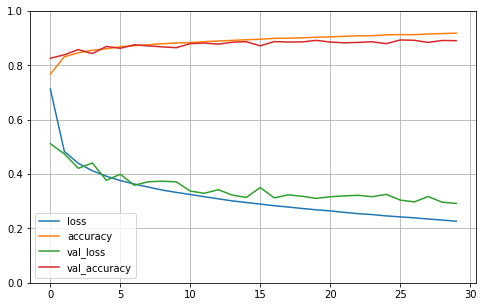

In [45]:
import pandas as pd 
import matplotlib.pyplot as plt 

history_dataframe = pd.DataFrame(history.history)
history_dataframe.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()


In [46]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 35us/sample - loss: 0.3264 - accuracy: 0.8836


[0.3263827322602272, 0.8836]

## Using the model to make predictions

In [47]:
#Using predict, allows you see the output layer completely
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [50]:
#If you are only interested in the class with the highest estimated probability
#you could use predict_classes, you get the index of the 
#output layer array with the highest score.
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [51]:
#you can use these indexes to get the class names
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [53]:
#Which is the correct answer
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

# Building a Regression MLP with the Sequential API

# Saving and restoring the Model

In [54]:
model.save("my_keras_model.h5")

In [55]:
my_loaded_model = keras.models.load_model("my_keras_model.h5")

In [57]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])